# Setup

In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
%matplotlib inline

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from bpp.catalog import create_uniform_catalog
from bpp.psf import get_gaussian_psf
from bpp.scene import create_gaussian_cutouts

# Draw Scene

In [45]:
# get astropy catalog of galaxy parameters
cat = create_uniform_catalog(n_rows=9)

In [46]:
# create PSF galsim object
psf = get_gaussian_psf(fwhm=0.7)

In [47]:
# draw the scene
pixel_scale = 0.2
slen = 81
cutouts = create_gaussian_cutouts(slen=slen, catalog=cat, psf=psf, pixel_scale=pixel_scale, g1=0.0, g2=0.0, sky_level=50, seed=0)

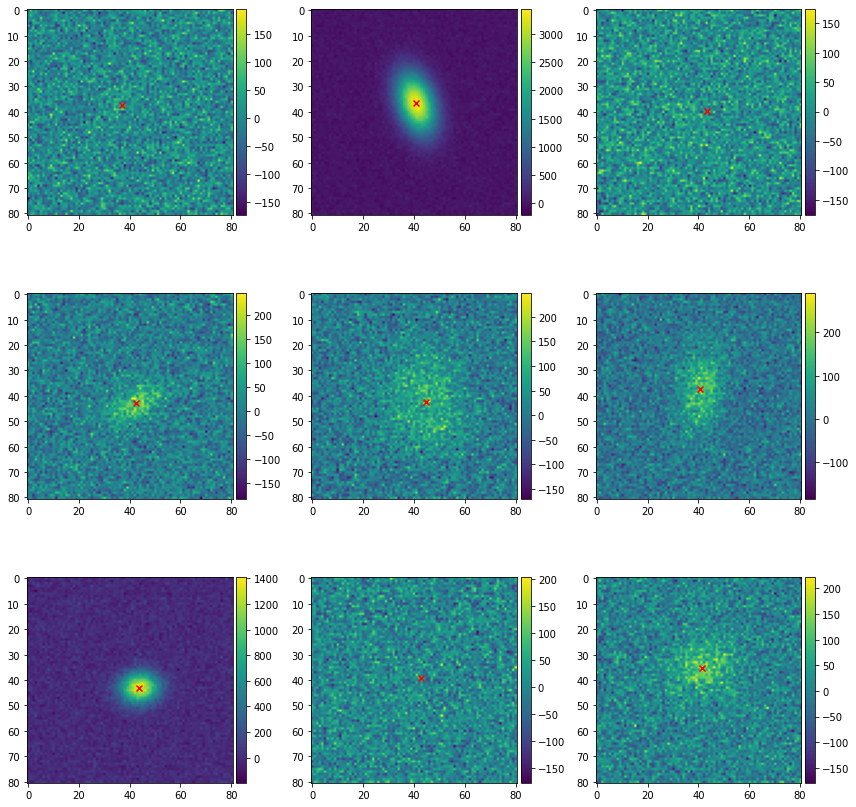

In [49]:
# let's look at some cutouts
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
for ii, ax in enumerate(axes.flatten()):
    im = ax.imshow(cutouts[ii], interpolation=None)
    # with centers
    ax.scatter(cat[ii]['ra']/ pixel_scale  - 0.5 + slen/2, cat[ii]['dec'] / pixel_scale - 0.5 + slen/2, marker='x', color='r')

    # colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
plt.tight_layout()
